In [2]:
# importing dataset:
with open("names.txt", "r") as dataset:
    words = dataset.readlines() # contains newline character at the end
    words = [word.strip() for word in words] # remove newline character from the end of each word


In [7]:
import torch

In [27]:
# we introduce '.' as a token that represents either start or end of a name 

# create a char to int mapping:
ctoi = {}
letters = sorted(list(set(''.join(words))))

for i, l in enumerate(letters):
    ctoi[l] = i + 1
ctoi['.'] = 0

# create int to char mappint:
itoc = {}
for ch, i in ctoi.items():
    itoc[i] = ch

In [41]:
""" tensor N stores counts of number of times token/char corresponding to row-index is followed 
token/char corresponding to column-idx """

N = torch.zeros(27, 27, dtype=int)

for w in words:
    char_arr = ['.'] + list(w) + ['.']
    # we wish to create pairs of consecutive letters from the dataset
    for ch1, ch2 in zip(char_arr, char_arr[1:]):
        ridx = ctoi[ch1]
        cidx = ctoi[ch2]
        N[ridx][cidx] += 1

In [47]:
# so, N stores counts
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [29]:
import matplotlib.pyplot as plt

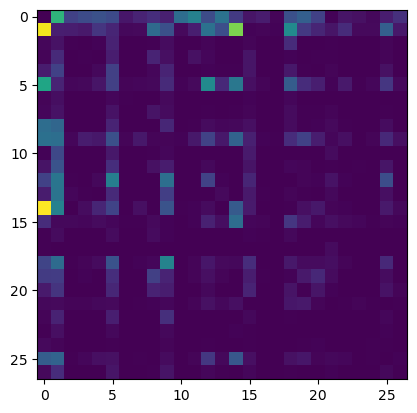

In [42]:
plt.imshow(N)

In [72]:
# we need a tensor P that stores the probability of row-idx-char being followed by col-idx-char

""" consider row with index i: this row stores counts when other chars followed ctoi[i]. 
So, to calculate probability tensor P, each entry in row i needs to be divided by sum of all elements
from row i """

P = N.float()
P /= P.sum(1, keepdim=True)
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [ ]:
# we expect the following sum to be 1 (infact, all rows of P sum up to 1):
P[0].sum()

tensor(1.)

In [ ]:
""" now, we start from a random token (char), and choose the next token according
to the probabily distribution for the next token (stored in tensor P) """

g = torch.Generator().manual_seed(5924847)

row_idx = 0

for _ in range(20):
    name = ""
    while True:
        p = P[row_idx]
        next_token = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itoc[next_token]
        row_idx = next_token
        if next_token == 0:
            # reached end-char, so break:
            break
    print(name)

""" following are some new names created by the model, based on probability of 
next character, when the previous character is given """

morerth.
donian.
ia.
me.
sie.
hay.
ahrkry.
aliay.
janzellelaramam.
kaissan.
aielli.
maiesukahantiann.
ee.
neken.
ks.
dinn.
yn.
the.
jolilelunta.
da.
